<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

 - [**Introduction**](#1)

 - [**Import and Set Up**](#2)
 
 - [**Pre-processing and feature selection**](#3)
    
 - [**Modelling and Evaluation**](#4)
    - [**Logistical Classification**](#4_1)
    - [**kNN**](#4_2)
    - [**Decision Tree**](#4_3)
    - [**Extra Trees**](#4_4)
    - [**Random Forest**](#4_5)
    - [**Gradient Boosting Classifier**](#4_6)
    - [**Neural Network MLP**](#4_7)
    - [**Neural Network MLP (Keras)**](#4_8)
    - [**GRU (Keras)**](#4_9)
    - [**LSTM (Keras)**](#4_10)
    
 - [**Evaluate**](#5)
   

<a id='1'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Introduction</b>

This Notebook is about transforming and modelling the data. A previous notebook of mine did the EDA using pandas-profiling and sweetviz. So its not great to load here.

The study has an all-in approach (using all descriptive features). It can be improved by adding back propagation and removing the features with high P-values. I did not have the time or motivation to do this as well. 

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Import and Set up</b>

In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [2]:
df = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [4]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,254,0,1.803636e+08,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,254,0,6.000000e+08,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,254,0,1.045333e+09,0.0,0,0,0.003,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,392,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,980,0,0,0,2,2,2,2,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,0,0,0.028,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,692,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.688,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,0,0,60000.712,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,46,0,0,0,2,2,2,2,2,2,0,0,0,2,2,1,Normal,0


In [5]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

The data quality report was generated for Post Block Assignment 1. This section will process and select the features in accordance with the recommendations of that report. 

## Drop irrelevant or excess feastures

The first feature to drop is 'id'. This feature is an index and not descriptive. 

The second feature to drop is 'attack_cat'. This feature is an extension of the target feature, therefore using it will give us 100% predictions but will not give us a generalizable model. 

The other features to be dropped are those that were too strongly correlated. In this current version none of them were dropped, as the model is first evaluated to see how well it can perform.

In [6]:
list_drop = ['id','attack_cat']

In [7]:
df.drop(list_drop,axis=1,inplace=True)

## Apply Clamping

The extreme values should be pruned to reduce the skewness of some distributions. The logic applied here is that the features with a maximum value more than ten times the median value is pruned to the 95th percentile. If the 95th percentile is close to the maximum, then the tail has more interesting information than what we want to discard. 

The clamping is also only applied to features with a maximum of more than 10 times the median. This prevents the bimodals and small value distributions from being excessively pruned.  

In [8]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [10]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,0.445016,11.84186,9.178424,1580.566135,2866.918367,71576.702810,180.967667,95.713003,4.649418e+07,3.105380e+05,2.188068,2.542729,37.836042,33.982038,1920.889858,199.566224,133.45908,1.074064e+09,1.062670e+09,128.28662,0.055925,0.029256,0.026669,124.772822,100.240891,0.092091,9.643063,9.259887,1.369273,5.269591,4.466611,3.388901,7.160679,0.008284,0.008381,0.092066,5.974809,8.832532,0.011126,0.550600
std,0.672222,15.66461,14.504212,2948.850472,7525.606738,102631.946851,101.513358,116.667722,7.417784e+07,8.918691e+05,3.057946,4.767511,57.658385,52.184248,2900.509949,520.285264,127.35700,1.368335e+09,1.358850e+09,127.49137,0.116022,0.070854,0.055094,148.294212,184.094183,0.289156,35.977508,10.221752,1.067188,6.729755,6.685037,5.029129,10.481621,0.091171,0.092485,0.289121,6.867156,10.124902,0.104891,0.497436
min,0.000000,1.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.00000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.00000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,17.623918,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.00000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3219.332412,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.403792,60.00000,54.000000,12472.000000,30622.000000,333333.321500,255.000000,253.000000,2.666667e+08,3.741446e+06,11.000000,18.000000,204.530258,167.626851,9532.382646,2218.933526,255.00000,3.876194e+09,3.862459e+09,255.00000,3.821465,3.226788,2.928778,638.000000,683.000000,1.000000,150.450000,37.000000,6.000000,25.000000,25.000000,18.000000,37.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


## Apply log function to nearly all numeric, since they are all mostly skewed to the right

It would have been too much of a slog to apply the log function individually, therefore a simple rule has been set up: if the number of unique values in the continuous feature is more than 50 then apply the log function. The reason more than 50 unique values are sought is to filter out the integer based features that act more categorically.  

In [11]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

## Reduce the labels in catagorical features

Some features have very high cardinalities, and this section reduces the cardinality to 5 or 6 per feature. The logic is to take the top 5 occuring labels in the feature as the labels and set the remainder to '-' (seldom used) labels. When the encoding is done later on, the dimensionality will not explode and cause the curse of dimensionality. 

In [12]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [13]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [14]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [15]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object')

In [16]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object')

## View before and after of features

This section simply displays the distributions within features before and after the transformations.  

## Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature. 

In [17]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

## Encode categorical features

The categorical features must be encoded to ensure that the models can interpret them. One-hot encoding is used since none of the categorical features are ordinal.  

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [21]:
np.shape(X)

(82332, 56)

In [22]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [23]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.09999395e-05, 6.93147181e-01, 0.00000000e+00,
       6.20657593e+00, 0.00000000e+00, 1.14176263e+01, 2.54000000e+02,
       0.00000000e+00, 1.90104856e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09399400e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.51342875e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [24]:
len(feature_names)

42

In [25]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [26]:
len(feature_names)

56

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

## Prep for Modelling

### Split test and training
In this section the data is split into test and training sets using stratified sampling. 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

### Standardize continuous features
a standard scaler is used on the continuous features to put them all in the same order of size.

In [28]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [29]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

### Import Metrics

Imports the libraries that will be used to evaluate the models later on

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])


<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Logistical Classification</b>

In [31]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 4.76 s, sys: 1.88 s, total: 6.64 s
Wall time: 1.69 s


In [32]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.80%
Recall: 92.80%
Precision: 92.83%
F1-Score: 92.80%
time to train: 1.68 s
time to predict: 0.00 s
total: 1.69 s


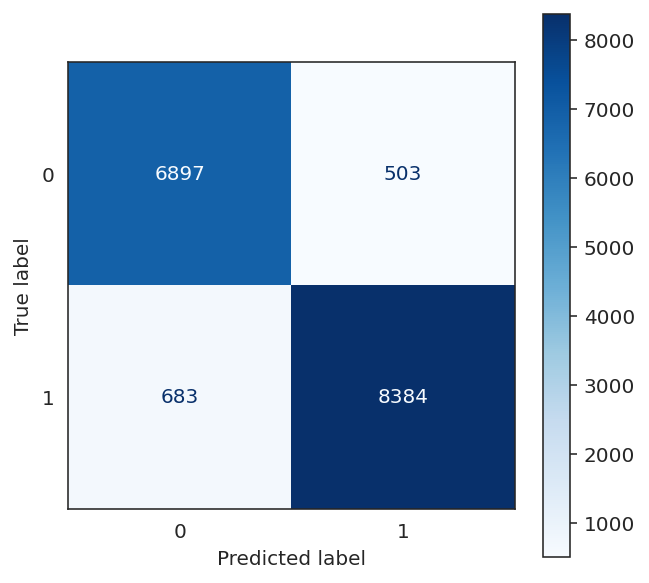

In [33]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

<a id='4_2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>kNN</b>

In [34]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 23.4 s, sys: 15 s, total: 38.4 s
Wall time: 20 s


In [35]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.04%
Recall: 95.04%
Precision: 95.09%
F1-Score: 95.05%
time to train: 0.01 s
time to predict: 20.04 s
total: 20.05 s


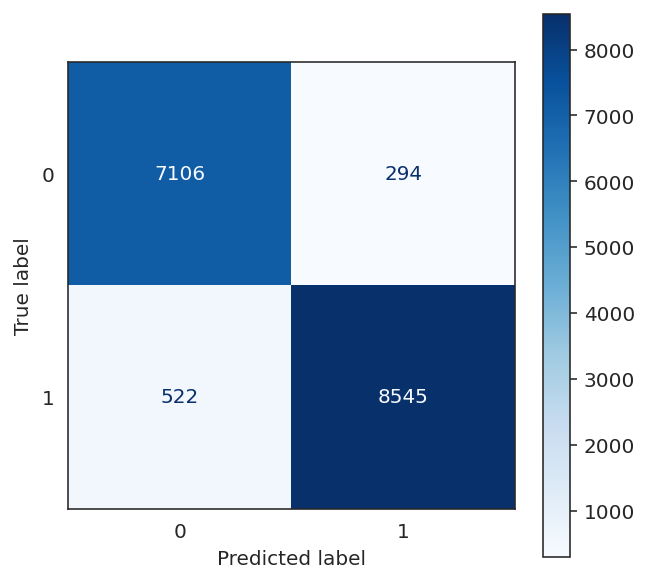

In [36]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Decision Tree</b>


In [37]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1.39 s, sys: 7.12 ms, total: 1.39 s
Wall time: 1.41 s


In [38]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.38%
Recall: 96.38%
Precision: 96.38%
F1-Score: 96.38%
time to train: 1.38 s
time to predict: 0.00 s
total: 1.38 s


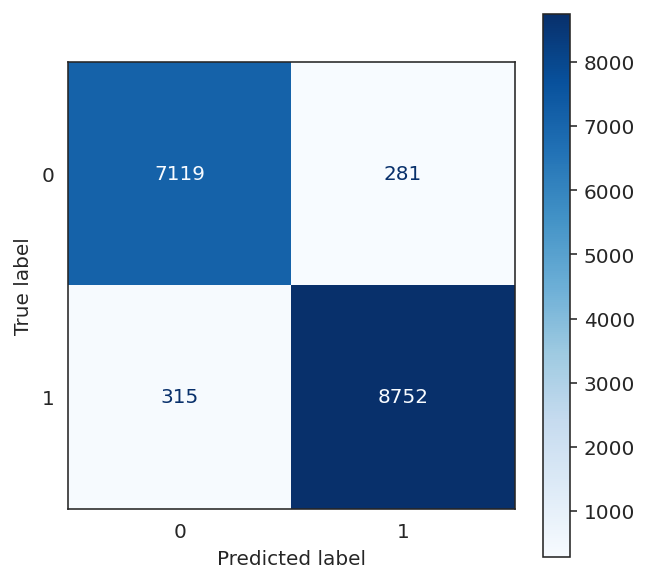

In [39]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

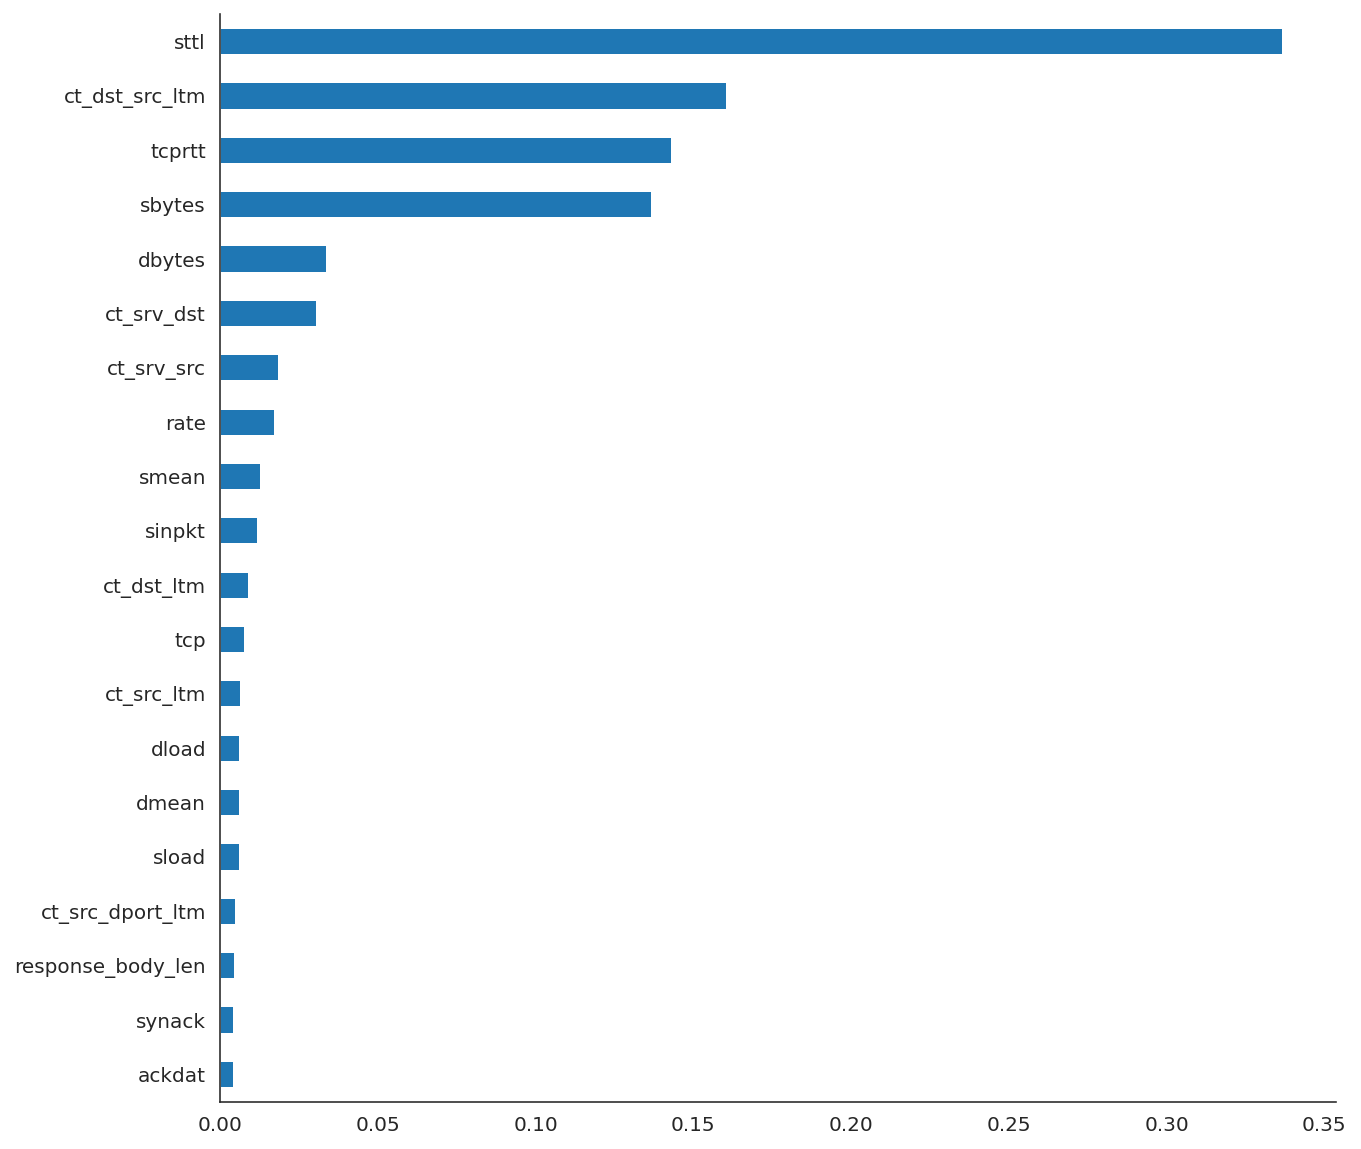

In [40]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_4'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Extra Trees</b>

In [41]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 14.2 s, sys: 117 ms, total: 14.4 s
Wall time: 3.94 s


In [42]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.53%
Recall: 97.53%
Precision: 97.55%
F1-Score: 97.53%
time to train: 3.67 s
time to predict: 0.21 s
total: 3.88 s


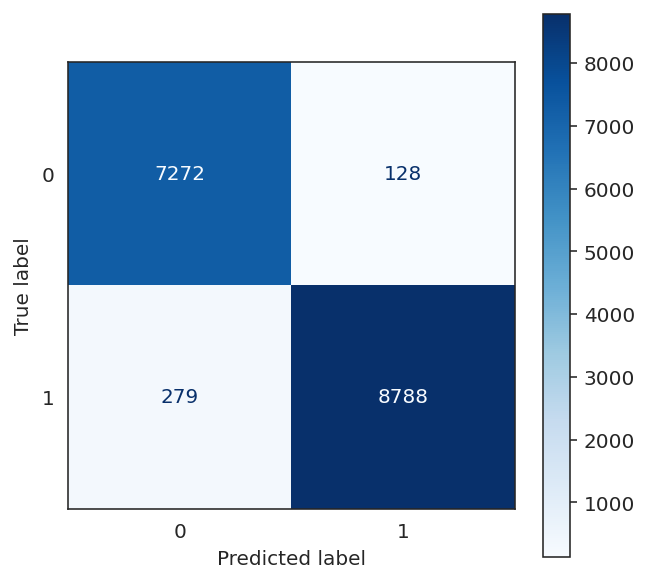

In [43]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

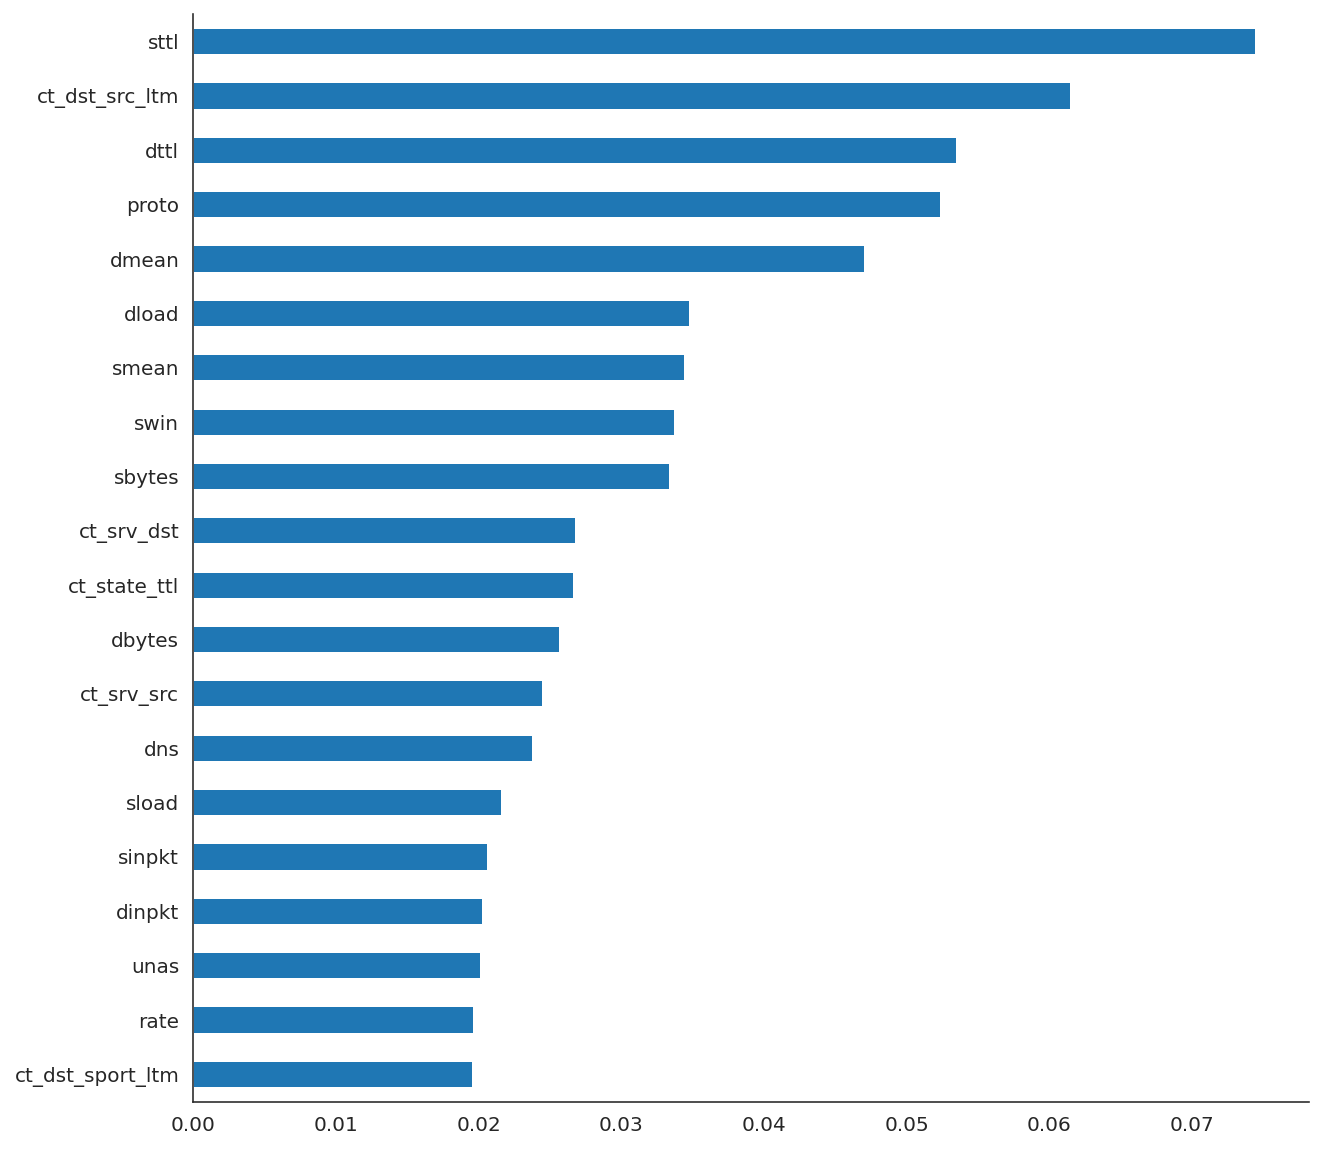

In [44]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
sns.despine()
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [45]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 20.7 s, sys: 84.3 ms, total: 20.8 s
Wall time: 5.68 s


In [46]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.68%
Recall: 97.68%
Precision: 97.69%
F1-Score: 97.68%
time to train: 5.47 s
time to predict: 0.21 s
total: 5.68 s


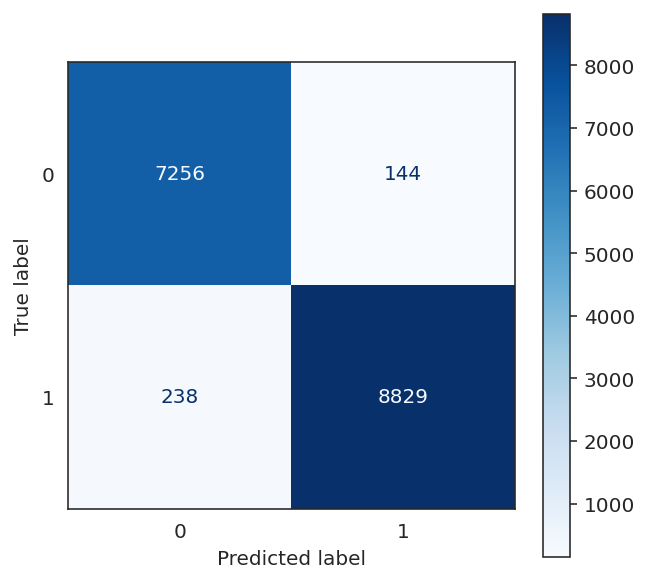

In [47]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

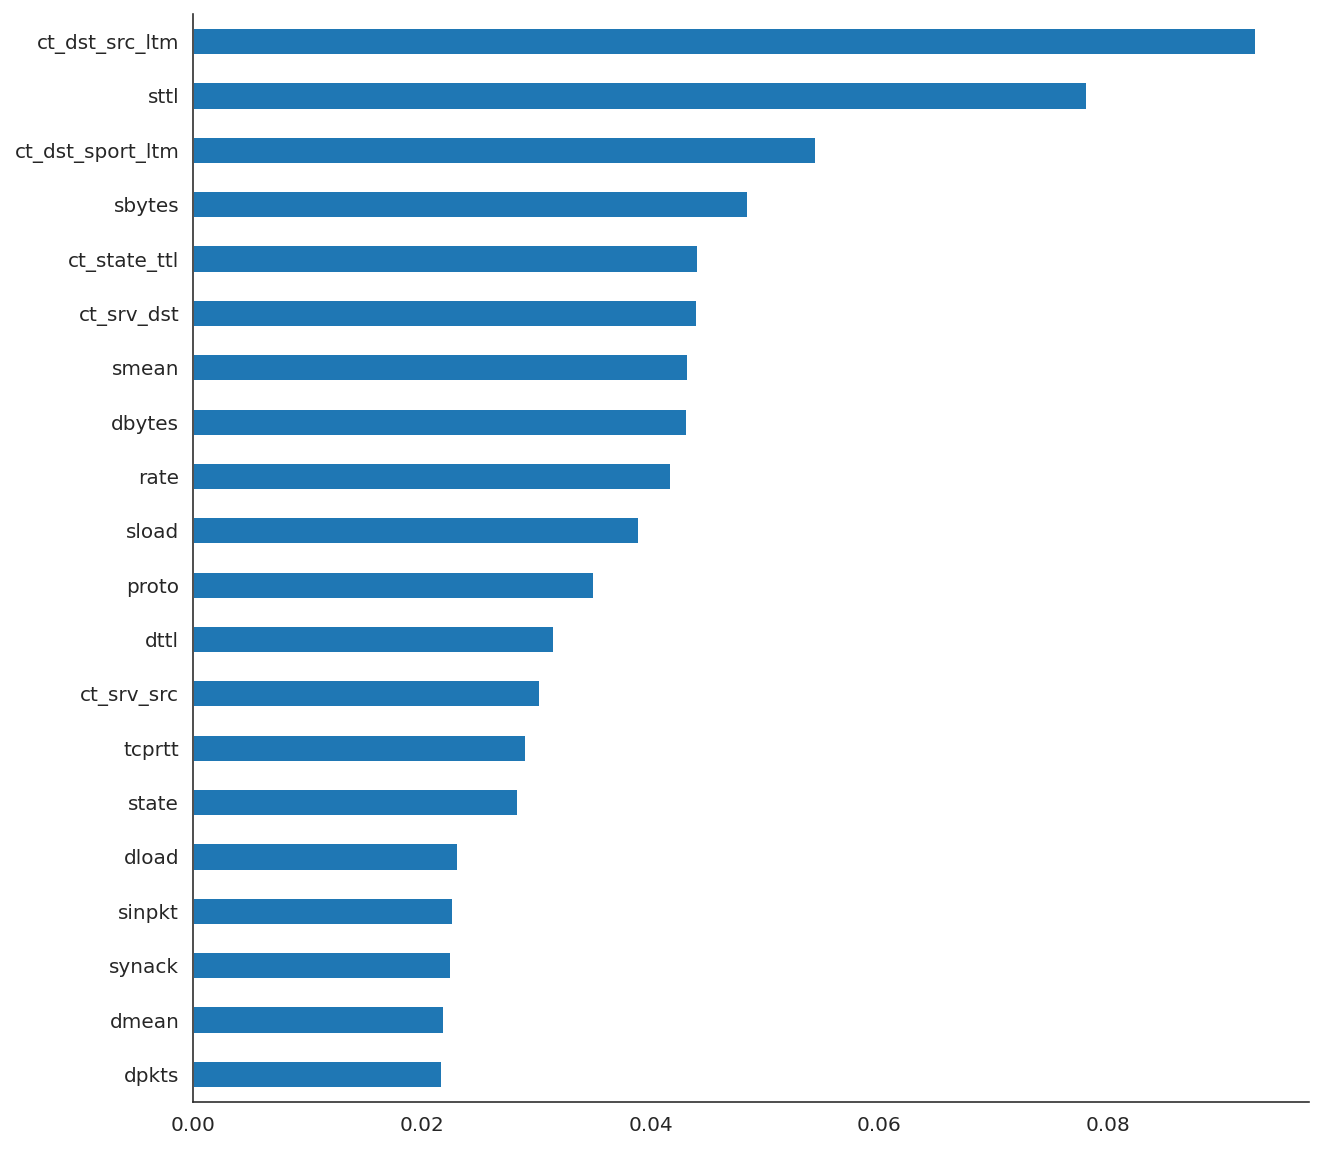

In [48]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Gradient Boosting Classifier</b>

In [49]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 46.5 s, sys: 9.04 ms, total: 46.5 s
Wall time: 47 s


In [50]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.85%
Recall: 95.85%
Precision: 95.86%
F1-Score: 95.85%
time to train: 46.92 s
time to predict: 0.04 s
total: 46.95 s


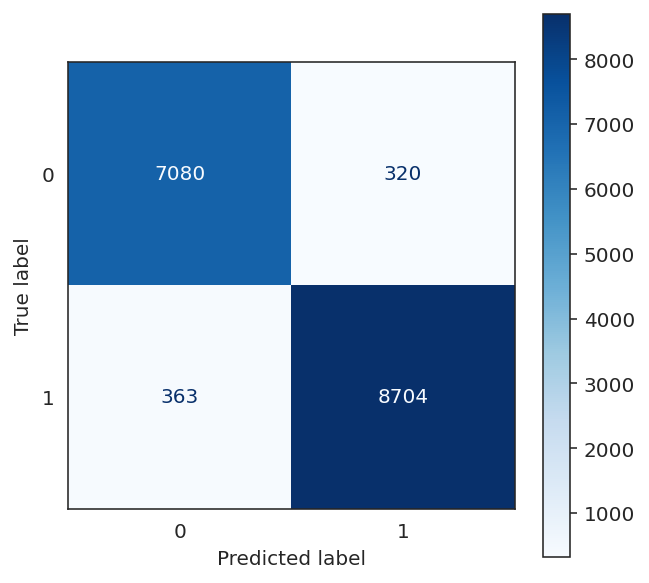

In [51]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

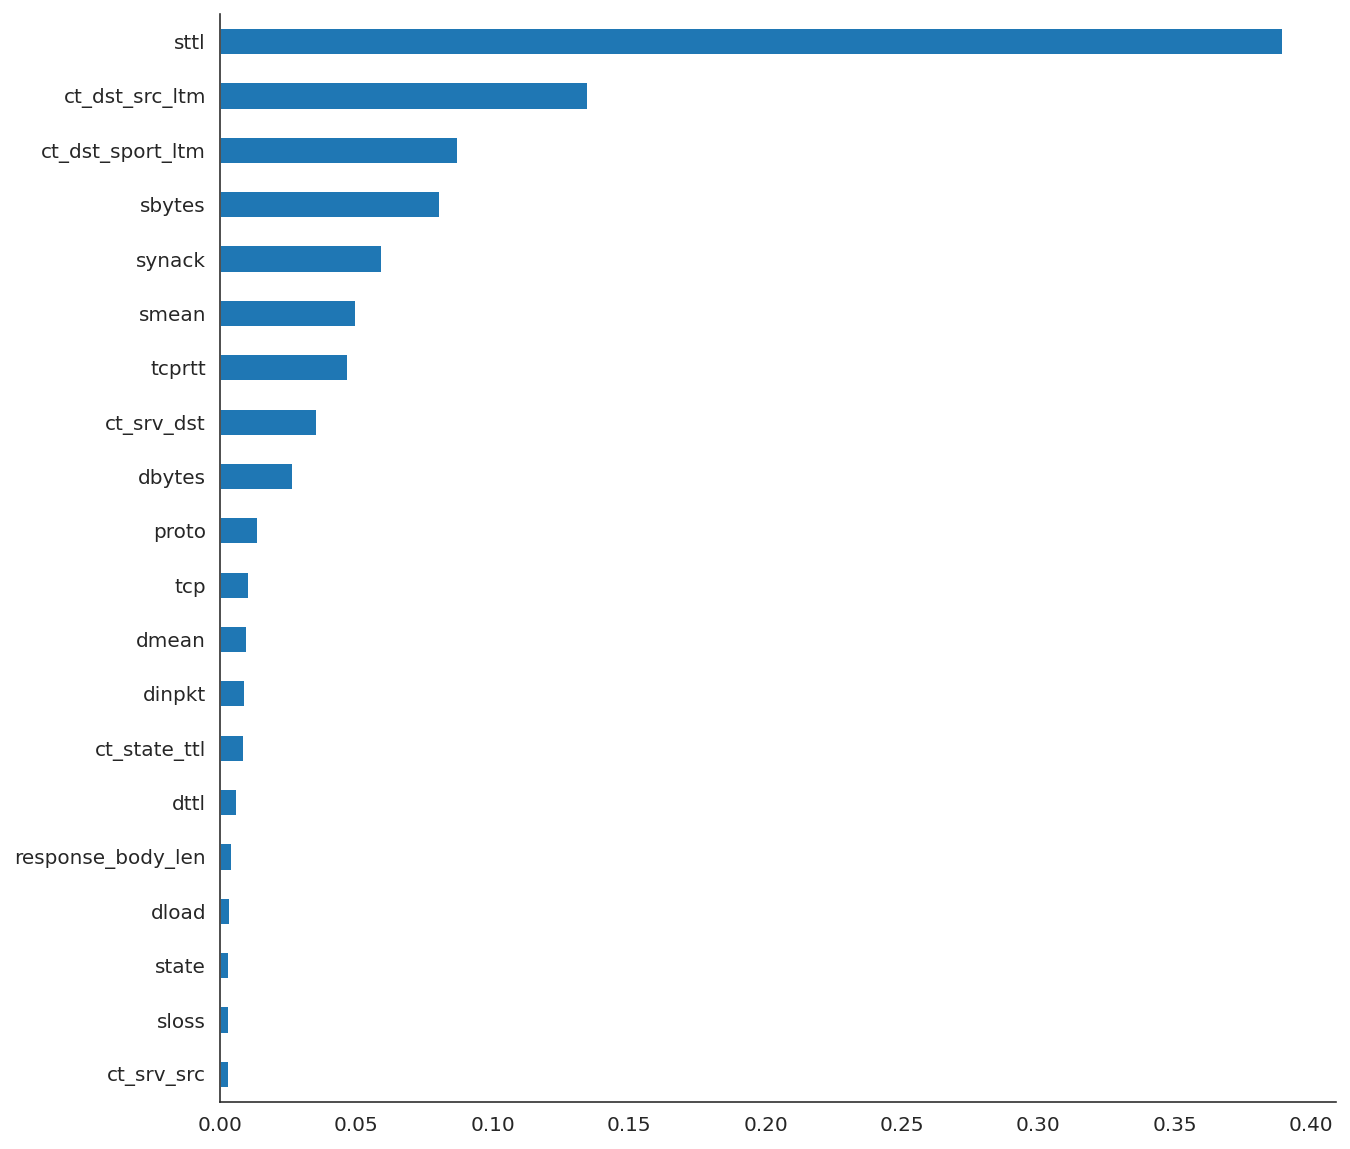

In [52]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

<a id='4_7'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP</b>

In [53]:
%%time
from sklearn.neural_network import MLPClassifier
start = time.time()
model = MLPClassifier(hidden_layer_sizes = (20,20,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1min 46s, sys: 1min 3s, total: 2min 50s
Wall time: 43.9 s


In [54]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['MLP'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.25%
Recall: 96.25%
Precision: 96.26%
F1-Score: 96.25%
time to train: 43.92 s
time to predict: 0.02 s
total: 43.94 s


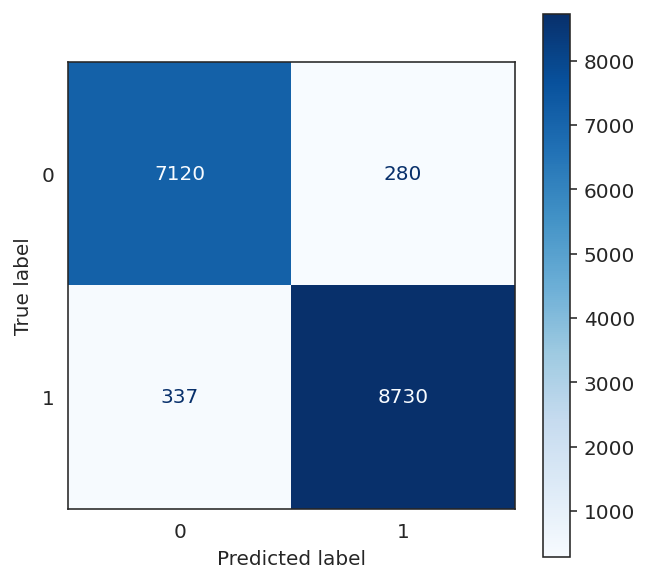

In [55]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [56]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,92.80%,92.80%,92.83%,92.80%,1.7,0.0,1.7
kNN,95.04%,95.04%,95.09%,95.05%,0.0,20.0,20.0
Decision Tree,96.38%,96.38%,96.38%,96.38%,1.4,0.0,1.4
Extra Trees,97.53%,97.53%,97.55%,97.53%,3.7,0.2,3.9
Random Forest,97.68%,97.68%,97.69%,97.68%,5.5,0.2,5.7
Gradient Boosting Classifier,95.85%,95.85%,95.86%,95.85%,46.9,0.0,47.0
MLP,96.25%,96.25%,96.26%,96.25%,43.9,0.0,43.9


<a id='4_8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Neural Network MLP (Keras)</b>

In [57]:
#Import libraries that will allow you to use keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
!pip install keras-metrics #It doesn't come with Google Colab
import keras_metrics as km #when compiling
import keras
import numpy as np
from numpy import array

In [58]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [59]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=56, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(X_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

2022-11-10 04:26:09.462310: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-10 04:26:09.691264: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
33/33 - 2s - loss: 2.5409 - accuracy: 0.2393 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00
Epoch 2/200
33/33 - 0s - loss: 1.3076 - accuracy: 0.7316 - f1_m: 0.2252 - precision_m: 0.3131 - recall_m: 0.1848
Epoch 3/200
33/33 - 0s - loss: 0.5753 - accuracy: 0.7974 - f1_m: 0.6778 - precision_m: 0.5757 - recall_m: 0.8359
Epoch 4/200
33/33 - 0s - loss: 0.4117 - accuracy: 0.8342 - f1_m: 0.6996 - precision_m: 0.5495 - recall_m: 0.9629
Epoch 5/200
33/33 - 0s - loss: 0.3540 - accuracy: 0.8481 - f1_m: 0.7075 - precision_m: 0.5510 - recall_m: 0.9885
Epoch 6/200
33/33 - 0s - loss: 0.3130 - accuracy: 0.8582 - f1_m: 0.7089 - precision_m: 0.5509 - recall_m: 0.9940
Epoch 7/200
33/33 - 0s - loss: 0.2794 - accuracy: 0.8673 - f1_m: 0.7096 - precision_m: 0.5510 - recall_m: 0.9966
Epoch 8/200
33/33 - 0s - loss: 0.2541 - accuracy: 0.8788 - f1_m: 0.7094 - precision_m: 0.5506 - recall_m: 0.9970
Epoch 9/200
33/33 - 0s - loss: 0.2361 - accuracy: 0.8876 - f1_m: 0.7097 - precision_

In [60]:
#Evaluate the neural network
loss, accuracy, f1s, precision, recall = model.evaluate(X_test, y_test)
end_predict = time.time()
model_performance.loc['MLP (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

515/515 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9610 - f1_m: 0.7060 - precision_m: 0.5505 - recall_m: 1.0000


<a id='4_9'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>GRU (Keras)</b>

In [61]:
#Build the neural network model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True,input_shape=(1,56)))
    model.add(GRU(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The GRU input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(X_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,56)

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,56) 


#institate the model
model = build_model()

start = time.time()
#fit the model
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

65865
Epoch 1/200
33/33 - 5s - loss: 2.0227 - accuracy: 0.5609
Epoch 2/200
33/33 - 0s - loss: 1.3035 - accuracy: 0.7189
Epoch 3/200
33/33 - 0s - loss: 0.7302 - accuracy: 0.7701
Epoch 4/200
33/33 - 0s - loss: 0.5165 - accuracy: 0.7930
Epoch 5/200
33/33 - 0s - loss: 0.4170 - accuracy: 0.8190
Epoch 6/200
33/33 - 0s - loss: 0.3467 - accuracy: 0.8475
Epoch 7/200
33/33 - 0s - loss: 0.2946 - accuracy: 0.8677
Epoch 8/200
33/33 - 0s - loss: 0.2593 - accuracy: 0.8876
Epoch 9/200
33/33 - 0s - loss: 0.2363 - accuracy: 0.8980
Epoch 10/200
33/33 - 0s - loss: 0.2203 - accuracy: 0.9048
Epoch 11/200
33/33 - 0s - loss: 0.2084 - accuracy: 0.9098
Epoch 12/200
33/33 - 0s - loss: 0.1982 - accuracy: 0.9166
Epoch 13/200
33/33 - 0s - loss: 0.1893 - accuracy: 0.9214
Epoch 14/200
33/33 - 0s - loss: 0.1809 - accuracy: 0.9272
Epoch 15/200
33/33 - 0s - loss: 0.1733 - accuracy: 0.9309
Epoch 16/200
33/33 - 0s - loss: 0.1665 - accuracy: 0.9350
Epoch 17/200
33/33 - 0s - loss: 0.1597 - accuracy: 0.9386
Epoch 18/200
33/3

In [62]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['GRU (Keras)'] = [accuracy, accuracy, accuracy, accuracy, end_train-start,end_predict-end_train,end_predict-start]

515/515 [==============================] - 3s 3ms/step - loss: 0.0891 - accuracy: 0.9633


In [63]:
np.shape(X)

(82332, 56)

<a id='4_10'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>LSTM (Keras)</b>

In [64]:
def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True,input_shape=(1,56)))
    model.add(LSTM(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(X_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,56)

#reshape output data
X_test_array=  array(X_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,56) 


#institate the model
model = build_model()


#fit the model
start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

65865
Epoch 1/200
33/33 - 5s - loss: 2.1952 - accuracy: 0.6549
Epoch 2/200
33/33 - 0s - loss: 1.7988 - accuracy: 0.7078
Epoch 3/200
33/33 - 0s - loss: 1.2176 - accuracy: 0.6868
Epoch 4/200
33/33 - 0s - loss: 0.8263 - accuracy: 0.6896
Epoch 5/200
33/33 - 0s - loss: 0.6439 - accuracy: 0.7303
Epoch 6/200
33/33 - 0s - loss: 0.5606 - accuracy: 0.7484
Epoch 7/200
33/33 - 0s - loss: 0.5076 - accuracy: 0.7580
Epoch 8/200
33/33 - 0s - loss: 0.4522 - accuracy: 0.7941
Epoch 9/200
33/33 - 0s - loss: 0.3897 - accuracy: 0.8386
Epoch 10/200
33/33 - 1s - loss: 0.3327 - accuracy: 0.8704
Epoch 11/200
33/33 - 0s - loss: 0.2913 - accuracy: 0.8882
Epoch 12/200
33/33 - 0s - loss: 0.2626 - accuracy: 0.8957
Epoch 13/200
33/33 - 0s - loss: 0.2419 - accuracy: 0.9014
Epoch 14/200
33/33 - 0s - loss: 0.2269 - accuracy: 0.9054
Epoch 15/200
33/33 - 0s - loss: 0.2148 - accuracy: 0.9099
Epoch 16/200
33/33 - 0s - loss: 0.2039 - accuracy: 0.9138
Epoch 17/200
33/33 - 0s - loss: 0.1936 - accuracy: 0.9192
Epoch 18/200
33/3

In [65]:
#Evaluate the neural network
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
# loss, accuracy, f1s, precision, recall = model.evaluate(X_test_reshaped, y_test)
end_predict = time.time()
model_performance.loc['LSTM (Keras)'] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]

515/515 [==============================] - 2s 2ms/step - loss: 0.0891 - accuracy: 0.9648


<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

The models are compared in this chapter to determine which give the best performance. It seems that the winner is the Random Forest with a good performance on speed and prediction. 

The MLP takes much longer to train in Keras than through sci-kit learn. I don't think that the verbosity of the output could have such a big impact. It is unclear why Keras is underperforming. 

In [66]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,92.80%,92.80%,92.83%,92.80%,1.7,0.0,1.7
kNN,95.04%,95.04%,95.09%,95.05%,0.0,20.0,20.0
Decision Tree,96.38%,96.38%,96.38%,96.38%,1.4,0.0,1.4
Extra Trees,97.53%,97.53%,97.55%,97.53%,3.7,0.2,3.9
Random Forest,97.68%,97.68%,97.69%,97.68%,5.5,0.2,5.7
Gradient Boosting Classifier,95.85%,95.85%,95.86%,95.85%,46.9,0.0,47.0
MLP,96.25%,96.25%,96.26%,96.25%,43.9,0.0,43.9
MLP (Keras),96.10%,96.10%,96.10%,96.10%,41.3,1.7,43.0
GRU (Keras),96.33%,96.33%,96.33%,96.33%,82.6,4.1,86.7
LSTM (Keras),96.48%,96.48%,96.48%,96.48%,86.0,3.0,89.0
